<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 10: Deriving Features from Dates and Time Variables </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

Date and time variables are those that contain information about dates, times, or date and time. In programming, we refer to these variables as datetime variables. Examples of the datetime variables are date of birth, time of the accident, and date of last payment. The datetime variables usually contain a multitude of different labels corresponding to a specific combination of date and time. We do not utilize the datetime variables in their raw format when building machine learning models. Instead, we enrich the dataset dramatically by deriving multiple features from these variables. In this Practical, we will learn how to derive a variety of new features from date and time.

Pls refer to the `Practical 10.0 - Practical 10.5` in the seperate files for details. 

## Exercise

In `airbnb_sg` dataset, extract useful features from `last_review` columns and visualize the new features. 

In [2]:
# import all the required packages

import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset and show the info of dataset
data = pd.read_csv('./data/airbnb_sg.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [5]:
data = data.dropna()

In [6]:
# Task 1: convert the data type of last_review from object to datatime
print(data['last_review'].dtype)
data['last_review'] = pd.to_datetime(data['last_review'])
print(data['last_review'].dtype)

object
datetime64[ns]


In [7]:
# Task 2: create new features from last_review column, e.g. last_review_year, last_review_month, last_review_week and etc.
data['last_review_year'] = data['last_review'].dt.year
data['last_review_month'] = data['last_review'].dt.month
data['last_review_week'] = data['last_review'].dt.week
data['last_review_day'] = data['last_review'].dt.day
data['last_review_weekday']=data['last_review'].dt.dayofweek
print(data.head())

      id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   ...  number_of_reviews  last_review reviews_per_month  \
0  ...                  1   2013-10-21

C:\Users\shahi\AppData\Local\Temp/ipykernel_2844/4119493590.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['last_review_week'] = data['last_review'].dt.week


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


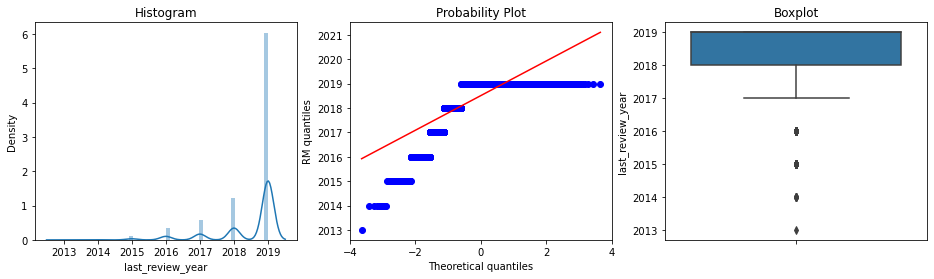

None


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


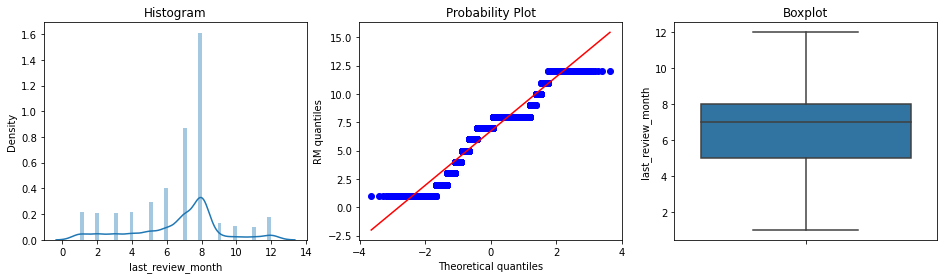

None


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


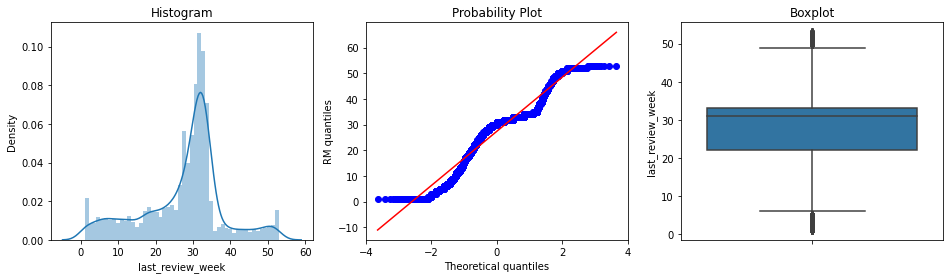

None


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


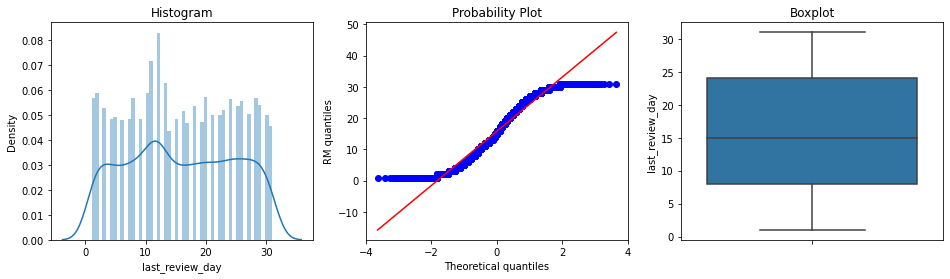

None


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


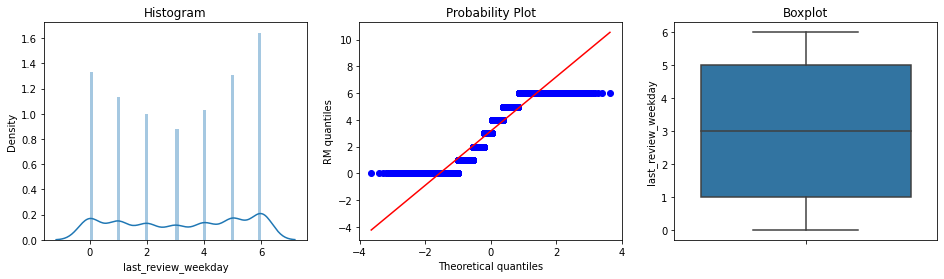

None


In [10]:
# Task 3: Visualize the newly created features
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=50)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()
    
data_lr = ['last_review_year','last_review_month','last_review_week','last_review_day','last_review_weekday']
for lr in data_lr:
    print(diagnostic_plots(data, lr))

 Task 4: Comment on the visualization
 (Hint: The data was collected on 28 August 2019) 

The last reviews were mostly made in 2019, showing that they were fairly recently reviewed within the last 6 months.
Of all the years, the most common month of the last review was in August and the most common date was around the 12th.
As for the weekday, last reviews were mostly done on a saturday and there was little or no reviews done on a sunday.
